# Assignment 20 (Course-a-Thon) Data science

# Problem 1

Set the variable test1 to the string 'This is a test of the emergency text system,' and save test1 to a file named test.txt.

### Solution

In [1]:
test1 = 'This is a test of the emergency text system,'
fileObj = open('test.txt','w')
fileObj.write(test1)

44

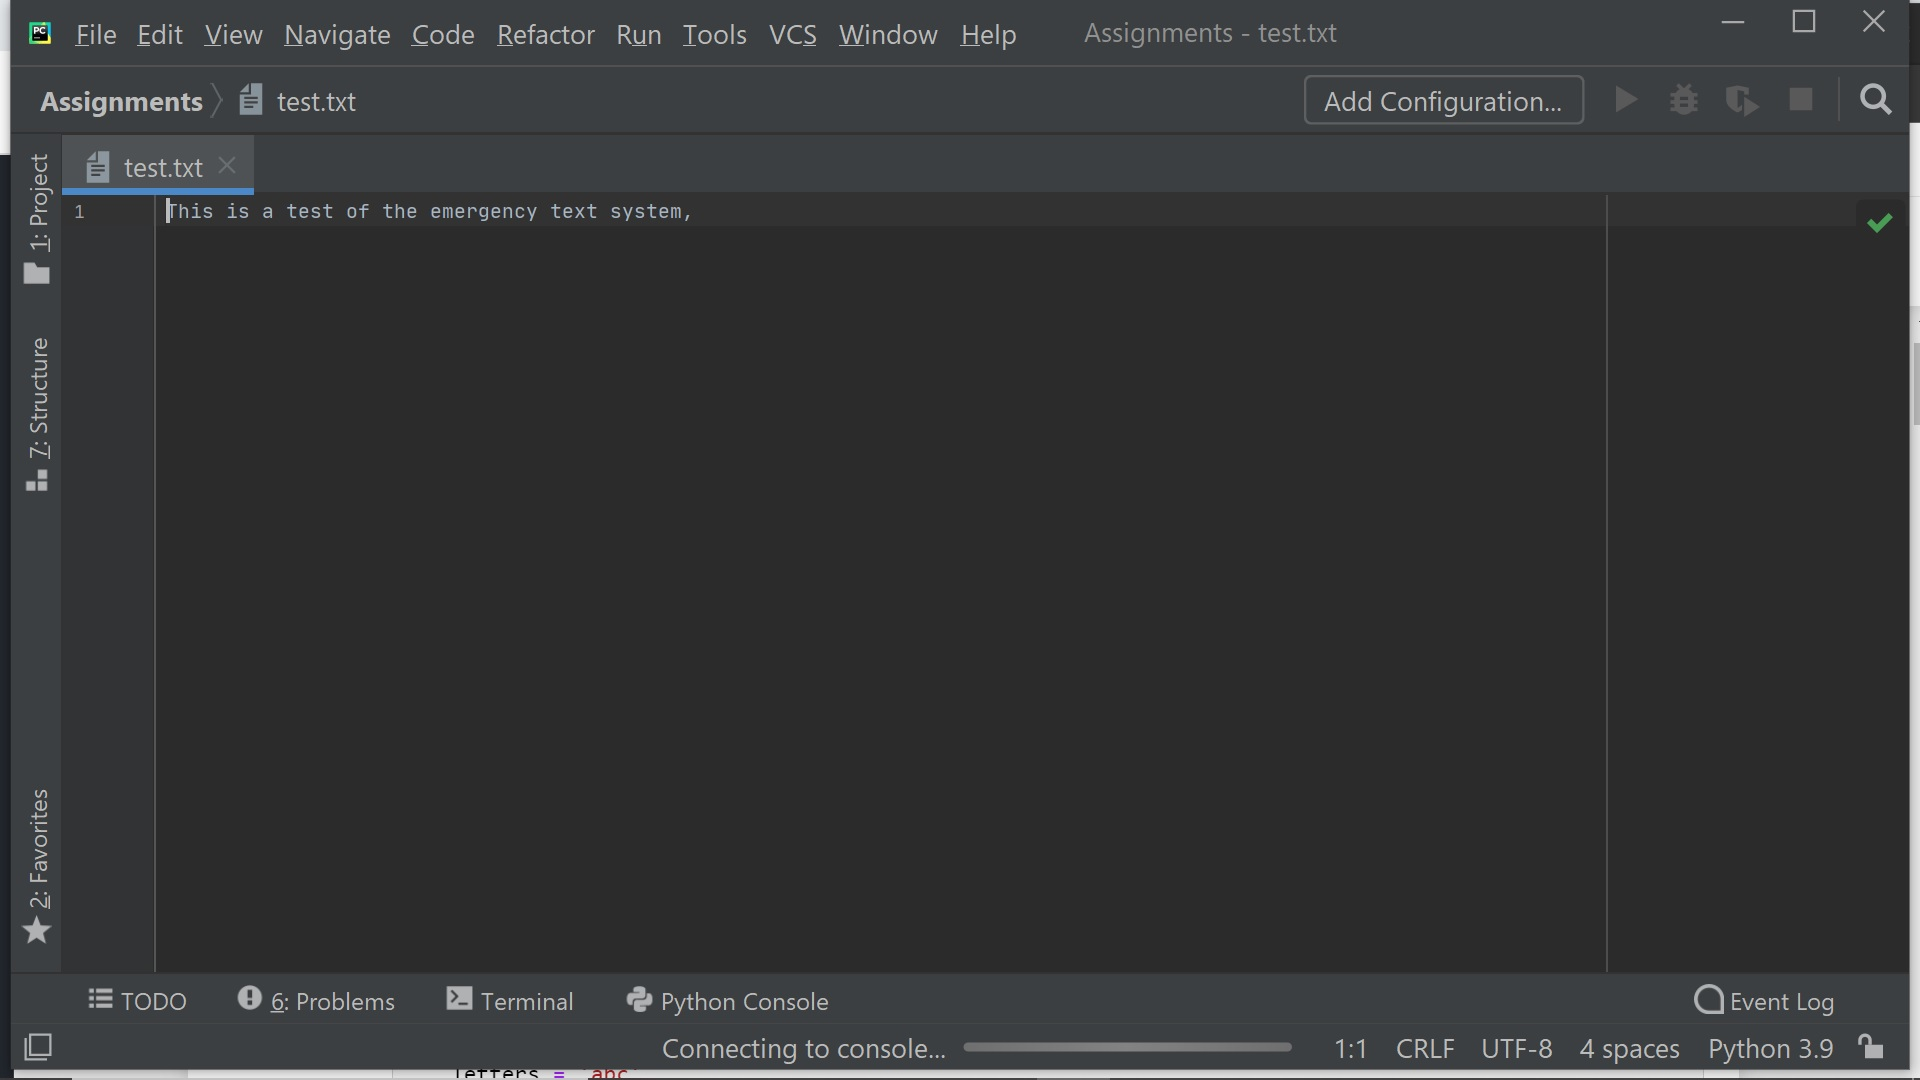

# Problem 2

Read the contents of the file test.txt into the variable test2. Is there a difference between test 1
and test 2?

### Solution

In [2]:
fileObj2 = open('test.txt','r')
test2 = fileObj2.readline()
test2
    

''

In [3]:
if test1==test2:
    print('Both are same')

# Problem 3

Create a CSV file called books.csv by using these lines:

title,author,year

The Weirdstone of Brisingamen,Alan Garner,1960

Perdido Street Station,China Miéville,2000

Thud!,Terry Pratchett,2005

The Spellman Files,Lisa Lutz,2007

Small Gods,Terry Pratchett,1992

### Solution

In [4]:
import csv
rows =[ ['title','author','year'],
    ['The Weirdstone of Brisingamen','Alan Garner',1960],
    ['Perdido Street Station','China Miéville',2000],
    ['Thud!','Terry Pratchett',2005],
    ['The Spellman Files','Lisa Lutz',2007],
    ['Small Gods','Terry Pratchett',1992]]
with open('books.csv','w',newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

# Problem 4

Use the sqlite3 module to create a SQLite database called books.db, and a table called books with these fields: title (text), author (text), and year (integer).

### Solution

In [5]:
import sqlite3
conn = sqlite3.connect('books.db')
c = conn.cursor()

c.execute('create table books(title varchar(20),author varchar(20), year int)')
conn.commit()

# Problem 5

Read books.csv and insert its data into the book table.

### Solution

In [6]:
import pandas as pd

read_books = pd.read_csv('books.csv',encoding='unicode_escape')
read_books.to_sql('books', conn, if_exists='append', index = False)

# Problem 6

Select and print the title column from the book table in alphabetical order.

### Solution

In [7]:
c.execute('select title from books order by title asc')
print(c.fetchall())

[('Perdido Street Station',), ('Small Gods',), ('The Spellman Files',), ('The Weirdstone of Brisingamen',), ('Thud!',)]


# Problem 7

From the book table, select and print all columns in the order of publication.

### Solution

In [8]:
c.execute('select title, author,year from books order by year')
#print(c.fetchall())

df = pd.DataFrame(c.fetchall(), columns=['title','author','year'])
df

,title,author,year
0,The Weirdstone of Brisingamen,Alan Garner,1960
1,Small Gods,Terry Pratchett,1992
2,Perdido Street Station,China Miéville,2000
3,Thud!,Terry Pratchett,2005
4,The Spellman Files,Lisa Lutz,2007


# Problem 8

Use the sqlalchemy module to connect to the sqlite3 database books.db that you just made in exercise 6.

### Solution

In [9]:
import sqlalchemy
engine = sqlalchemy.create_engine("sqlite:///books.db")
rows = engine.execute('select * from books')
for i in rows:
    print(i)

('The Weirdstone of Brisingamen', 'Alan Garner', 1960)
('Perdido Street Station', 'China Miéville', 2000)
('Thud!', 'Terry Pratchett', 2005)
('The Spellman Files', 'Lisa Lutz', 2007)
('Small Gods', 'Terry Pratchett', 1992)


# Problem 9

Install the Redis server and the Python redis library (pip install redis) on your computer. Create a Redis hash called test with the fields count (1) and name ('Fester Bestertester'). Print all the fields for test.

### Solution

In [ ]:
#!pip install redis
#import redis
#conn = redis.Redis()
#conn.delete('test')
#conn.hset('test',mapping = {'count' : 1, 'name' : 'Fester Bestertester'})
#conn.hset('test',key =  1, value = 'Fester Bestertester')
#conn.hgetall('test')

In [ ]:
import redis
conn = redis.Redis()
conn.delete('test')
conn.hmset('test', {'count': 1, 'name': 'Fester Bestertester'})
conn.hgetall('test')

# Problem 10

Increment the count field of test and print it.

### Solution

In [ ]:
conn.hincrby('test','count', 3)